
<a id='chap-tpreseauxneuronesmulticouches3'></a>

#  Réseaux de neurones multicouches (2) : reconnaissance de chiffres


Reprendre la méthodologie utilisée pour classifier les iris dans l'exercice précédent, et l'adapter au cas de la reconnaissance des chiffres manuscrits.

### Données `digits`

Nous reprenons les [données digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html?highlight=digits#sklearn.datasets.load_digits), un ensemble d’images en faible résolution (8 x 8 pixels) de chiffres manuscrits, déjà disponible dans Scikit-learn. 

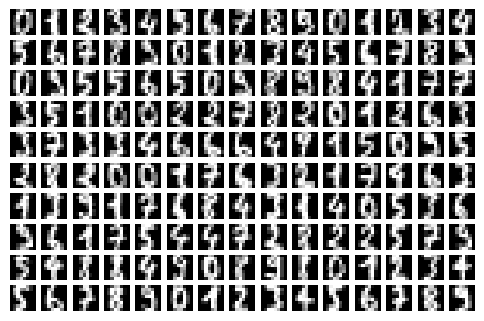

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = load_digits(return_X_y=True)
plt.figure(dpi=100)
for i in range(150):
    plt.subplot(10,15,i+1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')
    plt.axis('off')
plt.show()


Avant de faire apprendre des réseaux de neurones Séparer les données en ensembles d’apprentissage et de test :

In [2]:
Xa,Xt,ya,yt=train_test_split(X,y, test_size=0.2,shuffle=True)

### Classification par PMC linéaire à une couche cachée

Notre premier modèle est un PMC linéaire à une couche cachée de 2 neurones :

In [3]:
clf = MLPClassifier(hidden_layer_sizes=(2,), activation='identity', solver='adam', max_iter=5000, random_state=100)
clf.fit(Xa, ya)
print("Matrice de poids entrées -> couche cachée : {}".format(clf.coefs_[0].shape))
print("Matrice de poids couche cachée -> sorties : {}".format(clf.coefs_[1].shape))
train_score = clf.score(Xa, ya)
print("Le score en train est {}".format(train_score))
test_score = clf.score(Xt, yt)
print("Le score en test est {}".format(test_score))


Matrice de poids entrées -> couche cachée : (64, 2)
Matrice de poids couche cachée -> sorties : (2, 10)
Le score en train est 0.7940153096729298
Le score en test est 0.7916666666666666


Recalculer et afficher les valeurs des deux neurones de la couche cachée. que constatez-vous?

#### Forward propagation

In [4]:
W1=clf.coefs_[0].T
b1=clf.intercepts_[0].reshape(2,1)
Z1=W1.dot(Xa.T)+b1
A1=Z1 #activation - > idendity

In [5]:
print(A1.shape)
print(A1)

(2, 1437)
[[  6.44994508   2.02226367  -1.33048358 ...   0.92684628  -1.9897295
   -0.64404166]
 [  6.46948093   6.3961396   16.34977548 ...  -2.38262779  15.43668016
  -10.78794235]]


#### Affichage 

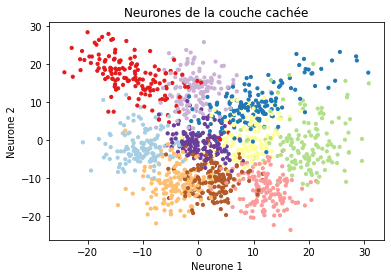

In [6]:
plt.title("Neurones de la couche cachée")
plt.scatter(A1[0,:],A1[1,:],cmap='Paired',c=ya,s=10)
plt.xlabel('Neurone 1')
plt.ylabel('Neurone 2')
plt.show()

<div class="alert alert-block alert-warning">
Les 10 chiffres ne sont pas bien séparés. Il faut plus de neurones. </div>

### Classification par PMC non linéaire à plusieurs couches cachées

### Question :

Employez un PMC à trois couches cachées de 40, 2 et respectivement 10 neurones et une fonction d’activation sigmoïde. Examinez les valeurs obtenues dans la couche cachée de 2 neurones, que constatez-vous?

### Correction :


##### Modèle 

In [7]:
clf = MLPClassifier(hidden_layer_sizes=(40,2,10), activation='logistic', solver='adam', max_iter=5000, random_state=100)
clf.fit(Xa, ya)
print("Matrice de poids entrées -> couche cachée : {}".format(clf.coefs_[0].shape))
print("Matrice de poids couche cachée -> sorties : {}".format(clf.coefs_[1].shape))
train_score = clf.score(Xa, ya)
print("Le score en train est {}".format(train_score))
test_score = clf.score(Xt, yt)
print("Le score en test est {}".format(test_score))

Matrice de poids entrées -> couche cachée : (64, 40)
Matrice de poids couche cachée -> sorties : (40, 2)
Le score en train est 1.0
Le score en test est 0.775


#### Forward propagation

In [8]:
W1=clf.coefs_[0].T
b1=clf.intercepts_[0].reshape(40,1)
Z1=W1.dot(Xa.T)+b1
A1=1/(1+np.exp(-Z1))   #activation - > sigmoide
print(A1.shape)
W2=clf.coefs_[1].T
b2=clf.intercepts_[1].reshape(2,1)
Z2=W2.dot(A1)+b2
A2=1/(1+np.exp(-Z2))   #activation - > sigmoide
print(A2.shape)

(40, 1437)
(2, 1437)


#### Affichage 


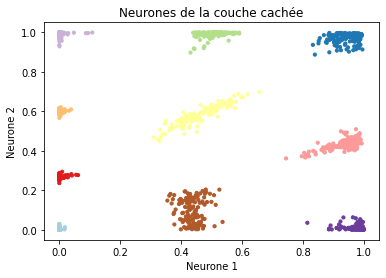

In [9]:
plt.title("Neurones de la couche cachée")
plt.scatter(A2[0,:],A2[1,:],cmap='Paired',c=ya,s=10)
plt.xlabel('Neurone 1')
plt.ylabel('Neurone 2')
plt.show()

<div class="alert alert-block alert-success">
Les 10 chiffres sont bien séparés. </div>